In [1]:
!pip install seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

starting
starting
starting
starting
starting
starting
starting
starting
starting


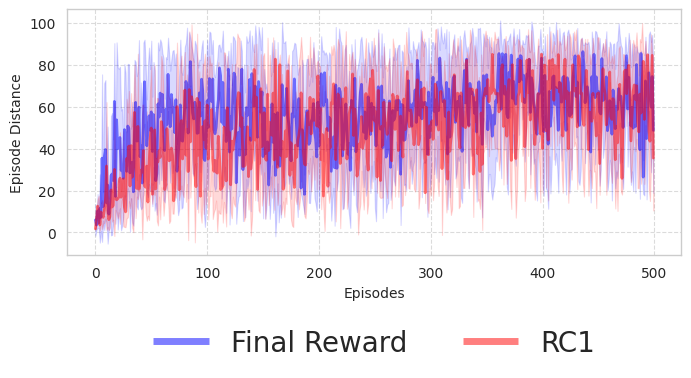

In [2]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/sum/distance Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean = means
    qrsac_r1_std, qrsac_r2_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="Final Reward", linewidth=2, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="r", label="RC1", linewidth=2, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="r", alpha=0.15)
   
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([80, 90])
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Episode Distance", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,6):
    reward_type = "rew2"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1,5):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_2.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

WIN_SIZE=1
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means, stds = (means_r1, means_r2), (stds_r1, stds_r2)
generate_plot(means, stds, "result_plot")


Throttle

starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting


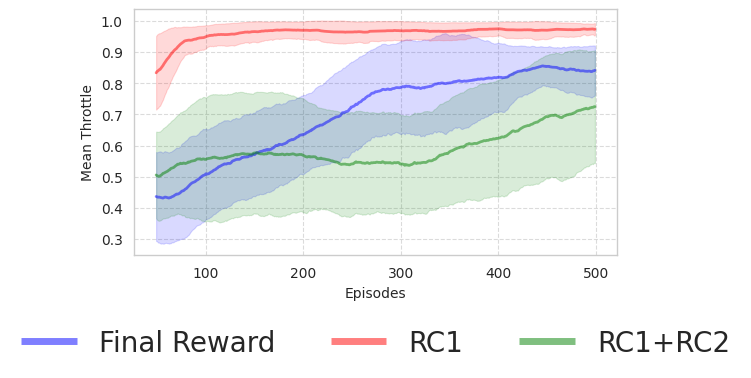

In [3]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/action_throttle Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/action_throttle Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="Final Reward", linewidth=2, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="r", label="RC1", linewidth=2, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="RC1+RC2", linewidth=2, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="r", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="g", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Throttle", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,6):
    reward_type = "rew2"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1,6):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_2.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1,6):
    reward_type = "rew4"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_3.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
# print(means_r3)
means, stds = (means_r1, means_r2, means_r3), (stds_r1, stds_r2, stds_r3)
generate_plot(means, stds, "result_plot")


starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting


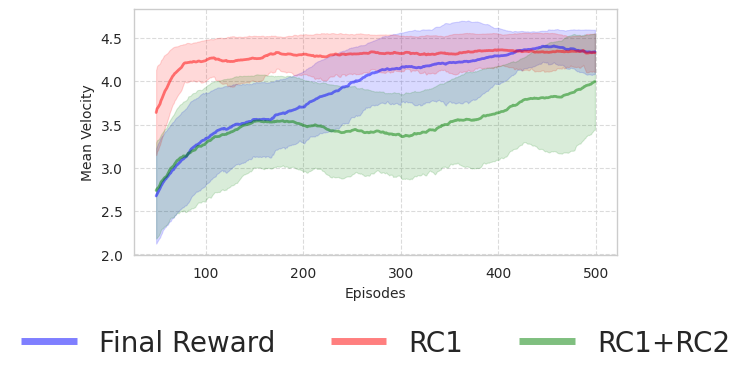

In [ ]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/vel Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="Final Reward", linewidth=2, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="r", label="RC1", linewidth=2, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="RC1+RC2", linewidth=2, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="r", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="g", alpha=0.15)
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Velocity", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,6):
    reward_type = "rew2"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1,6):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_2.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1,6):
    reward_type = "rew4"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_3.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
# print(means_r3)
means, stds = (means_r1, means_r2, means_r3), (stds_r1, stds_r2, stds_r3)
generate_plot(means, stds, "result_plot")


RETURN

LAPTIME

Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_4.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log


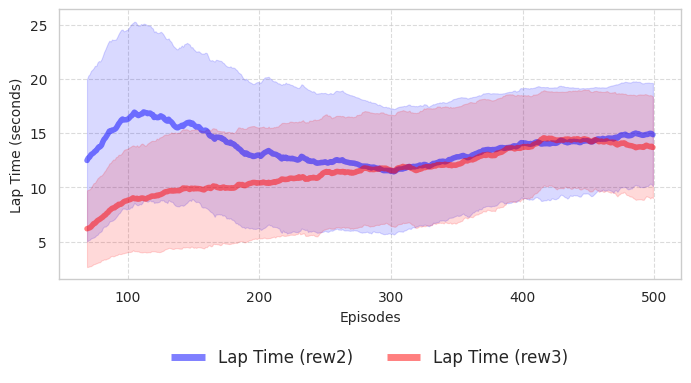

In [31]:
import re
import numpy as np
import matplotlib.pyplot as plt

def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def get_metrics(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize lists to store the extracted data
    vel_mean_data = []
    distance_data = []
    
    # Regular expression patterns for Vel Mean and sum/distance Mean
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')
    distance_pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    vel_ct = 0
    dist_ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                vel_match = vel_pattern.search(line)
                if vel_match:
                    vel_ct += 1
                    vel_mean = float(vel_match.group(1))
                    vel_mean_data.append(vel_mean)
                
                distance_match = distance_pattern.search(line)
                if distance_match:
                    dist_ct += 1
                    distance = float(distance_match.group(1))
                    distance_data.append(distance)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None, None
    
    if not vel_mean_data or not distance_data:
        print(f"Warning: Missing data in {log_file_path}. Vel Mean matches: {vel_ct}, Distance Mean matches: {dist_ct}")
        return vel_mean_data if vel_mean_data else None, distance_data if distance_data else None
    
    return vel_mean_data, distance_data

def calculate_lap_time(vel_mean_data, distance_data):
    # Ensure the lists are of the same length (truncate to shortest)
    min_length = min(len(vel_mean_data), len(distance_data))
    vel_mean_data = vel_mean_data[:min_length]
    distance_data = distance_data[:min_length]
    
    # Initialize list to store lap times
    lap_times_velocity = []
    
    for vel, distance in zip(vel_mean_data, distance_data):
        # Calculate lap time using velocity (distance / velocity) if velocity > 0
        if vel > 0:
            lap_time_vel = distance / vel
        else:
            lap_time_vel = float('inf')  # Handle cases where velocity is 0 or negative
        lap_times_velocity.append(lap_time_vel)
    
    return lap_times_velocity

def generate_plot(means_rew2, stds_rew2, means_rew3, stds_rew3, save_path=""):
    xs_rew2 = np.arange(len(means_rew2))
    xs_rew3 = np.arange(len(means_rew3))
    
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Plot lap time for rew2
    plt.plot(xs_rew2, means_rew2, c="b", label="Lap Time (rew2)", linewidth=4, alpha=0.5)
    plt.fill_between(xs_rew2,
                     means_rew2 - stds_rew2,
                     means_rew2 + stds_rew2,
                     color="b", alpha=0.15)
    
    # Plot lap time for rew3
    plt.plot(xs_rew3, means_rew3, c="r", label="Lap Time (rew3)", linewidth=4, alpha=0.5)
    plt.fill_between(xs_rew3,
                     means_rew3 - stds_rew3,
                     means_rew3 + stds_rew3,
                     color="r", alpha=0.15)
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
                     ncol=2, frameon=False, fancybox=False, shadow=False,
                     fontsize=12)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Lap Time (seconds)", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}_lap_time.png", dpi=200)
    plt.show()

# Process multiple log files for rew2 and rew3
lap_times_vel_rew2_all = []
lap_times_vel_rew3_all = []

# Process rew2 logs
for idx in range(1, 5):
    reward_type = "rew2"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew2_all.append(lap_times_velocity)

# Process rew3 logs
for idx in range(1, 5):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew3_all.append(lap_times_velocity)

# Calculate mean and standard deviation across runs for both rew2 and rew3
if lap_times_vel_rew2_all and lap_times_vel_rew3_all:
    # Ensure all arrays are of the same length (truncate to shortest length if necessary)
    min_length_rew2 = min(len(run) for run in lap_times_vel_rew2_all)
    min_length_rew3 = min(len(run) for run in lap_times_vel_rew3_all)
    lap_times_vel_rew2_all = [run[:min_length_rew2] for run in lap_times_vel_rew2_all]
    lap_times_vel_rew3_all = [run[:min_length_rew3] for run in lap_times_vel_rew3_all]
    
    # Convert to numpy arrays for calculation
    lap_times_vel_rew2_array = np.array(lap_times_vel_rew2_all)
    lap_times_vel_rew3_array = np.array(lap_times_vel_rew3_all)
    
    # Replace infinities with a large value for plotting purposes
    large_value = 1e6  # Arbitrary large value to represent invalid lap times
    lap_times_vel_rew2_array = np.where(lap_times_vel_rew2_array == float('inf'), large_value, lap_times_vel_rew2_array)
    lap_times_vel_rew3_array = np.where(lap_times_vel_rew3_array == float('inf'), large_value, lap_times_vel_rew3_array)
    
    # Calculate mean and std for rew2
    lap_times_vel_rew2_mean = np.mean(lap_times_vel_rew2_array, axis=0)
    lap_times_vel_rew2_std = np.std(lap_times_vel_rew2_array, axis=0)
    
    # Calculate mean and std for rew3
    lap_times_vel_rew3_mean = np.mean(lap_times_vel_rew3_array, axis=0)
    lap_times_vel_rew3_std = np.std(lap_times_vel_rew3_array, axis=0)
    
    # Apply smoothing with window size 70
    WIN_SIZE = 70
    lap_times_vel_rew2_mean = smoothen(lap_times_vel_rew2_mean, WIN_SIZE)
    lap_times_vel_rew2_std = smoothen(lap_times_vel_rew2_std, WIN_SIZE)
    lap_times_vel_rew3_mean = smoothen(lap_times_vel_rew3_mean, WIN_SIZE)
    lap_times_vel_rew3_std = smoothen(lap_times_vel_rew3_std, WIN_SIZE)
    
    # Generate plot
    generate_plot(lap_times_vel_rew2_mean, lap_times_vel_rew2_std, lap_times_vel_rew3_mean, lap_times_vel_rew3_std, save_path="lap_time_plot")
else:
    print("No data to plot for one or both reward types.")

Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_4.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew2_5.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_1.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_2.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_3.log
Starting processing for /home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_road_rew3_4.log
Starting processing for /home/smukh039/work/QR

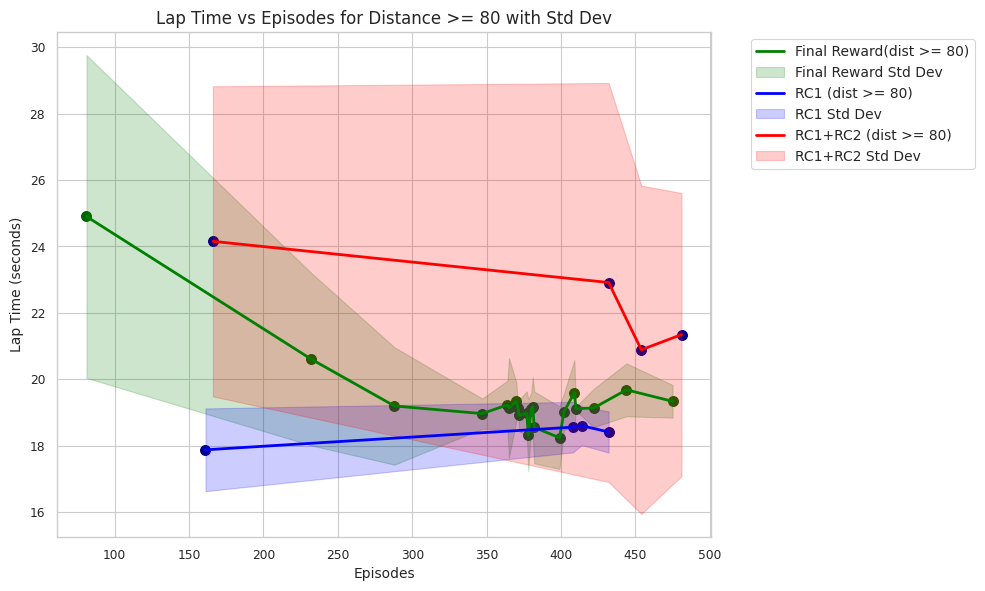

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def smoothen(arr, smoothing_window=70):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def get_metrics(reward_type, log_num, env_type, log_file_path):
    print("Starting processing for", log_file_path)
    
    # Initialize lists to store the extracted data
    vel_mean_data = []
    distance_data = []
    
    # Regular expression patterns for Vel Mean and sum/distance Mean
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')
    distance_pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')
    
    vel_ct = 0
    dist_ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                vel_match = vel_pattern.search(line)
                if vel_match:
                    vel_ct += 1
                    vel_mean = float(vel_match.group(1))
                    vel_mean_data.append(vel_mean)
                
                distance_match = distance_pattern.search(line)
                if distance_match:
                    dist_ct += 1
                    distance = float(distance_match.group(1))
                    distance_data.append(distance)
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None, None
    
    if not vel_mean_data or not distance_data:
        print(f"Warning: Missing data in {log_file_path}. Vel Mean matches: {vel_ct}, Distance Mean matches: {dist_ct}")
        return vel_mean_data if vel_mean_data else None, distance_data if distance_data else None
    
    return vel_mean_data, distance_data

def calculate_lap_time(vel_mean_data, distance_data):
    # Ensure the lists are of the same length (truncate to shortest)
    min_length = min(len(vel_mean_data), len(distance_data))
    vel_mean_data = vel_mean_data[:min_length]
    distance_data = distance_data[:min_length]
    
    # Initialize list to store lap times
    lap_times_velocity = []
    
    for vel, distance in zip(vel_mean_data, distance_data):
        # Calculate lap time using velocity (distance / velocity) if velocity > 0
        if vel > 0:
            lap_time_vel = distance / vel
        else:
            lap_time_vel = float('inf')  # Handle cases where velocity is 0 or negative
        lap_times_velocity.append(lap_time_vel)
    
    return lap_times_velocity

def generate_2d_plot(epochs_rew2, lap_times_rew2_mean, lap_times_rew2_std, distance_rew2, 
                     epochs_rew3, lap_times_rew3_mean, lap_times_rew3_std, distance_rew3, 
                     epochs_rew4, lap_times_rew4_mean, lap_times_rew4_std, distance_rew4, save_path=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter and plot for rew2 where distance >= 80
    mask_rew2_above_80 = distance_rew2 >= 80
    if np.any(mask_rew2_above_80):
        epochs_rew2_filtered = epochs_rew2[mask_rew2_above_80]
        lap_times_rew2_filtered = lap_times_rew2_mean[mask_rew2_above_80]
        lap_times_rew2_std_filtered = lap_times_rew2_std[mask_rew2_above_80]
        
        # Plot mean line
        ax.plot(epochs_rew2_filtered, lap_times_rew2_filtered, c='green', label='Final Reward(dist >= 80)', linewidth=2)
        # Plot scatter points for mean
        ax.scatter(epochs_rew2_filtered, lap_times_rew2_filtered, c='darkgreen', marker='o', s=50)
        # Plot standard deviation as translucent shading
        ax.fill_between(epochs_rew2_filtered, 
                        lap_times_rew2_filtered - lap_times_rew2_std_filtered, 
                        lap_times_rew2_filtered + lap_times_rew2_std_filtered, 
                        color='green', alpha=0.2, label='Final Reward Std Dev')
    
    # Uncomment this block to include rew3 plotting with std dev
    
    # Filter and plot for rew3 where distance >= 80
    mask_rew3_above_80 = distance_rew3 >= 80
    if np.any(mask_rew3_above_80):
        epochs_rew3_filtered = epochs_rew3[mask_rew3_above_80]
        lap_times_rew3_filtered = lap_times_rew3_mean[mask_rew3_above_80]
        lap_times_rew3_std_filtered = lap_times_rew3_std[mask_rew3_above_80]
        
        # Plot mean line
        ax.plot(epochs_rew3_filtered, lap_times_rew3_filtered, c='blue', label='RC1 (dist >= 80)', linewidth=2)
        # Plot scatter points for mean
        ax.scatter(epochs_rew3_filtered, lap_times_rew3_filtered, c='darkblue', marker='o', s=50)
        # Plot standard deviation as translucent shading
        ax.fill_between(epochs_rew3_filtered, 
                        lap_times_rew3_filtered - lap_times_rew3_std_filtered, 
                        lap_times_rew3_filtered + lap_times_rew3_std_filtered, 
                        color='blue', alpha=0.2, label='RC1 Std Dev')
        

    mask_rew4_above_80 = distance_rew4 >= 80
    if np.any(mask_rew4_above_80):
        epochs_rew4_filtered = epochs_rew4[mask_rew4_above_80]
        lap_times_rew4_filtered = lap_times_rew4_mean[mask_rew4_above_80]
        lap_times_rew4_std_filtered = lap_times_rew4_std[mask_rew4_above_80]
        
        # Plot mean line
        ax.plot(epochs_rew4_filtered, lap_times_rew4_filtered, c='red', label='RC1+RC2 (dist >= 80)', linewidth=2)
        # Plot scatter points for mean
        ax.scatter(epochs_rew4_filtered, lap_times_rew4_filtered, c='darkblue', marker='o', s=50)
        # Plot standard deviation as translucent shading
        ax.fill_between(epochs_rew4_filtered, 
                        lap_times_rew4_filtered - lap_times_rew4_std_filtered, 
                        lap_times_rew4_filtered + lap_times_rew4_std_filtered, 
                        color='red', alpha=0.2, label='RC1+RC2 Std Dev')
    
    
    # Set labels
    ax.set_xlabel('Episodes', fontsize=10)
    ax.set_ylabel('Lap Time (seconds)', fontsize=10)
    ax.set_title('Lap Time vs Episodes for Distance >= 80 with Std Dev', fontsize=12)
    
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"{save_path}_2d_lap_time_distance.png", dpi=200)
    plt.show()

# Process multiple log files for rew2 and rew3
lap_times_vel_rew2_all = []
lap_times_vel_rew3_all = []
lap_times_vel_rew4_all = []
distance_rew2_all = []
distance_rew3_all = []
distance_rew4_all = []

# Process rew2 logs
for idx in range(1, 6):
    reward_type = "rew2"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew2_all.append(lap_times_velocity)
        distance_rew2_all.append(distance_data)

# Process rew3 logs
for idx in range(1, 6):
    reward_type = "rew3"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew3_all.append(lap_times_velocity)
        distance_rew3_all.append(distance_data)

# Process rew3 logs
for idx in range(1, 6):
    reward_type = "rew4"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    vel_mean_data, distance_data = get_metrics(reward_type, log_num, env_type, log_file_path)
    
    if vel_mean_data is not None and distance_data is not None:
        lap_times_velocity = calculate_lap_time(vel_mean_data, distance_data)
        lap_times_vel_rew4_all.append(lap_times_velocity)
        distance_rew4_all.append(distance_data)

# Calculate mean and std across runs for both rew2 and rew3
if lap_times_vel_rew2_all and lap_times_vel_rew3_all and lap_times_vel_rew4_all:
    # Ensure all arrays are of the same length (truncate to shortest length if necessary)
    min_length_rew2 = min(len(run) for run in lap_times_vel_rew2_all)
    min_length_rew3 = min(len(run) for run in lap_times_vel_rew3_all)
    min_length_rew4 = min(len(run) for run in lap_times_vel_rew4_all)
    min_length_dist_rew2 = min(len(run) for run in distance_rew2_all)
    min_length_dist_rew3 = min(len(run) for run in distance_rew3_all)
    min_length_dist_rew4 = min(len(run) for run in distance_rew4_all)
    
    lap_times_vel_rew2_all = [run[:min_length_rew2] for run in lap_times_vel_rew2_all]
    lap_times_vel_rew3_all = [run[:min_length_rew3] for run in lap_times_vel_rew3_all]
    lap_times_vel_rew4_all = [run[:min_length_rew4] for run in lap_times_vel_rew4_all]
    distance_rew2_all = [run[:min_length_dist_rew2] for run in distance_rew2_all]
    distance_rew3_all = [run[:min_length_dist_rew3] for run in distance_rew3_all]
    distance_rew4_all = [run[:min_length_dist_rew4] for run in distance_rew4_all]

    # Convert to numpy arrays for calculation
    lap_times_vel_rew2_array = np.array(lap_times_vel_rew2_all)
    lap_times_vel_rew3_array = np.array(lap_times_vel_rew3_all)
    lap_times_vel_rew4_array = np.array(lap_times_vel_rew4_all)
    distance_rew2_array = np.array(distance_rew2_all)
    distance_rew3_array = np.array(distance_rew3_all)
    distance_rew4_array = np.array(distance_rew4_all)
    
    # Replace infinities with a large value for plotting purposes
    large_value = 1e6  # Arbitrary large value to represent invalid lap times
    lap_times_vel_rew2_array = np.where(lap_times_vel_rew2_array == float('inf'), large_value, lap_times_vel_rew2_array)
    lap_times_vel_rew3_array = np.where(lap_times_vel_rew3_array == float('inf'), large_value, lap_times_vel_rew3_array)
    lap_times_vel_rew4_array = np.where(lap_times_vel_rew4_array == float('inf'), large_value, lap_times_vel_rew4_array)
    
    # Calculate mean and std for rew2
    lap_times_vel_rew2_mean = np.mean(lap_times_vel_rew2_array, axis=0)
    lap_times_vel_rew2_std = np.std(lap_times_vel_rew2_array, axis=0)
    distance_rew2_mean = np.mean(distance_rew2_array, axis=0)
    
    # Calculate mean and std for rew3
    lap_times_vel_rew3_mean = np.mean(lap_times_vel_rew3_array, axis=0)
    lap_times_vel_rew3_std = np.std(lap_times_vel_rew3_array, axis=0)
    distance_rew3_mean = np.mean(distance_rew3_array, axis=0)
    
    # Calculate mean and std for rew4
    lap_times_vel_rew4_mean = np.mean(lap_times_vel_rew4_array, axis=0)
    lap_times_vel_rew4_std = np.std(lap_times_vel_rew4_array, axis=0)
    distance_rew4_mean = np.mean(distance_rew4_array, axis=0)

    # Apply smoothing with window size 70 for better visualization
    WIN_SIZE = 1
    lap_times_vel_rew2_mean = smoothen(lap_times_vel_rew2_mean, WIN_SIZE)
    lap_times_vel_rew2_std = smoothen(lap_times_vel_rew2_std, WIN_SIZE)
    distance_rew2_mean = smoothen(distance_rew2_mean, WIN_SIZE)
    lap_times_vel_rew3_mean = smoothen(lap_times_vel_rew3_mean, WIN_SIZE)
    lap_times_vel_rew3_std = smoothen(lap_times_vel_rew3_std, WIN_SIZE)
    distance_rew3_mean = smoothen(distance_rew3_mean, WIN_SIZE)
    lap_times_vel_rew4_mean = smoothen(lap_times_vel_rew4_mean, WIN_SIZE)
    lap_times_vel_rew4_std = smoothen(lap_times_vel_rew4_std, WIN_SIZE)
    distance_rew4_mean = smoothen(distance_rew4_mean, WIN_SIZE)
    
    # Generate epochs (x-axis)
    epochs_rew2 = np.arange(len(lap_times_vel_rew2_mean))
    epochs_rew3 = np.arange(len(lap_times_vel_rew3_mean))
    epochs_rew4 = np.arange(len(lap_times_vel_rew4_mean))
    
    # Generate 2D plot with std dev
    generate_2d_plot(epochs_rew2, lap_times_vel_rew2_mean, lap_times_vel_rew2_std, distance_rew2_mean, 
                     epochs_rew3, lap_times_vel_rew3_mean, lap_times_vel_rew3_std, distance_rew3_mean,
                     epochs_rew4, lap_times_vel_rew4_mean, lap_times_vel_rew4_std, distance_rew4_mean,  
                     save_path="lap_time_plot")
else:
    print("No data to plot for one or both reward types.")
